# 1 : 분류의 개요

지도학습의 대표적인 유형인 분류는 학습 데이터로 주어진 데이터의 feature와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.

- 분류는 다음과 같은 다양한 머신러닝 알고리즘으로 구현할 수 있다.

> 베이즈 통계와 생성모델에 기반한 **나이브 베이즈(Naive Bayes)**

> 독립 변수와 종속변수의 선형 관계성에 기반한 **로지스틱 회귀(Logistic Regression)**

> 데이터 균일도에 따른 규칙 기반의 **결정트리(Decision Tree)**

> 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 **서포트 벡터 머신(SVM)**

> 근접 거리를 기준으로 하는 **KNN 알고리즘**

> 심층 연결 기반의 **신경망(Neural Network)**

> 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블(Ensemble)**

 이번 장에서는 위 알고리즘 중, **결정트리**와 **앙상블** 알고리즘에 대하여 집중적으로 알아보겠다.
 
 > 나이브 베이즈, 로지스틱 회귀, SVM 및 KNN은 '파이썬 라이브러리를 활용한 머신러닝' 교재를 정리한 포스트에서 다루겠다.

# 2 : 결정 트리

 결정트리는 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것이다. 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것인데, 쉽게 생각하면 스무고개 게임과 유사하다고 할 수 있다.
 
 가능한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 **최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록** 결정 노드의 규칙이 정해져야 한다. 이를 위해서는 어떻게 트리를 분할할 것인가가 중요한데, **최대한 균일한 데이터 세트를 구성**할 수 있도록 분할하는 것이 필요하다.

따라서 데이터의 어떤 '기준'을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.
더이상 서로 다른 분류 값들이 없으면 '리프 노드'로 결정을 해준다

**결정트리는 매우 쉽고 유연하게 적용할 수 있다. 또한, 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다.**


**그러나 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(over fitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있다.**
따라서 이를 극복하기 위해서는 트리의 크기를 사전에 제한하는 튜닝이 필요하다.
반면 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용한다. 앙상블은 매우 많은 여러개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)을
향상시키는데, 결정 트리가 좋은 약한 학습기가 되기 때문이다.(GBM, XGBoost, LightGBM 등)

## 결정 트리 파라미터

사이킷 런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 제공한다.

사이킷 런의 결정트리 구현은 CART(Classification And Regression Trees) 알고리즘ㅇ 기반이므로, 회귀와 분류 두 가지 모두 가능하다.

* min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수(과적합을 제어하는데 사용됨)
>default는 2이고, 작게 설정할 수록 분할되는 노드가 많아져서 과적합 가능성 증가

* min_samples_leaf : 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
> Min_samples_split와 유사하게 과적합 제어 용도로 사용된다. **그러나 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요** 

* max_features : 최적의 분할을 위해 고려할 최대 feature 개수. default는 None으로 데이터 set의 모든 feature을 사용해 분할 수행
> int형으로 지정하면 대상 feature의 개수, float형으로 지정하면 전체 feature 중 대상 feature의 퍼센트이다.

> 'sqrt'는 전체 feature 중 sqrt(전체 feature 개수), 즉 $ \sqrt{전체feature개수} $ 만큼 선정한다.

>'auto'로 지정하면 sqrt와 동일

> 'log'는 전체 feature 중  $log_2 (전체feature개수)$ 선정

> 'None'은 전체 feature 선정

* max_depth : 트리의 최대 깊이를 규정
> default는 None, None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴.

> 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값을 제어 필요.

* max_leaf_nodes : 말단 노드의 최대 개수

## 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

iris_data.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

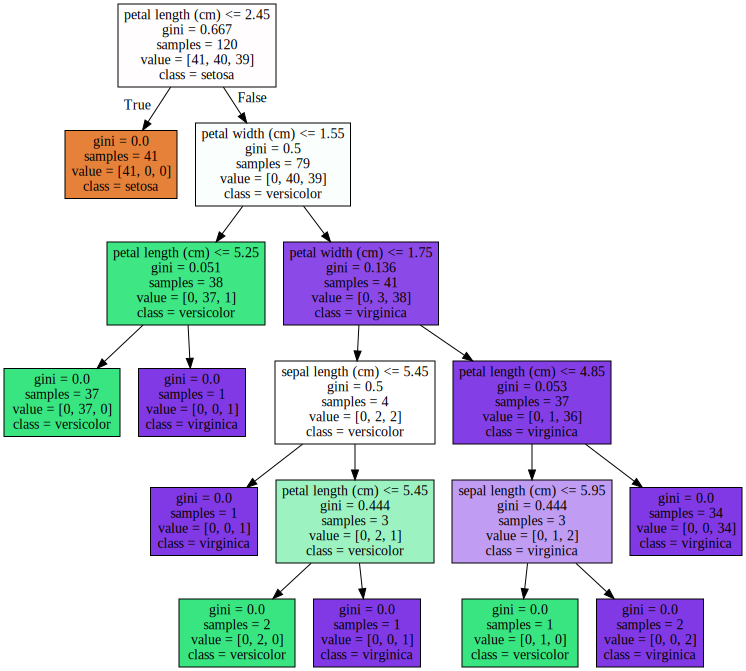

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


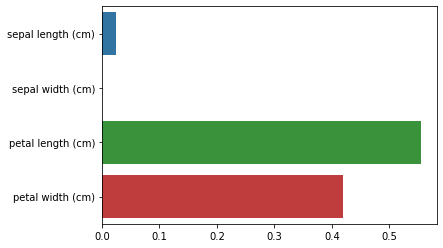

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

## 결정 트리(Decision TREE) 과적합(Overfitting)

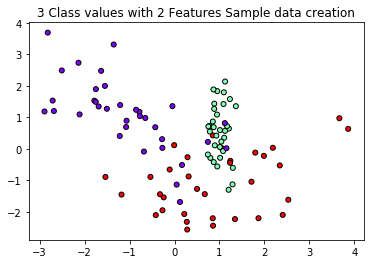

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [6]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

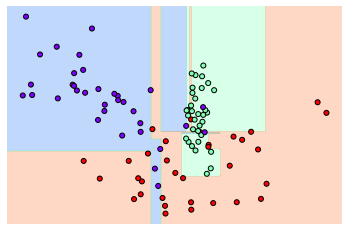

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 3 : 앙상블 학습

## 앙상블 학습 개요

앙상블 학습을 통한 분류는 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법이다.

이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있다.

[앙상블의 유형]
- 보팅, 배깅, 부스팅, 스태킹

> 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다. 이 둘의 다른 점은 **보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합**하는 것이고, **배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, data sampling을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행**하는 것이다. 배깅의 대표적인 예시로 랜덤 포레스트 알고리즘이 있다.

* 배깅 분류기에서 개별 Classifier에게 데이터를 sampling해서 추출하는 방식을 bootstrapping 분할 방식이라고 부른다.개별 Classifier가 bootstrapping 방식으로 sampling된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식이 **배깅** 앙상블 방식이다.
> **배깅**은 boostrap aggregating의 줄임말이다.

>교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용한다. 따라서 10000개의 데이터를 10개의 분류기가 배깅 방식으로 나누더라도 각 1000개의 데이터 내에는 중복된 데이터가 있다.

* **부스팅**은 여러개의 분류기가 **순차적으로 학습**을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것이다. GB, XGB, LGBM이 있다.

* **스태킹**은 여러가지 다른 모델의 예측 결괏값을 **다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습**시켜 결과를 예측하는 방법이다.

## 보팅의 유형 - 하드보팅(Hard Voting)과 소프트 보팅(Soft Voting)

- **하드 보팅** : 각 분류기의 예측 결과를 다수결로 적용하여 최종 class를 결정한다.
- **소프트 보팅** : 각 분류기의 예측 확률을 평균하여 결정한다.
ex) 분류기 1 : [0.7, 0.3], 분류기 2 : [0.2, 0.8], 분류기 3 : [0.8, 0.2], 분류기 4 : [0.9, 0.1] ->(각 index를 평균하여) [0.65, 0.35]에 의해 class를 결정한다.
->사이킷 런에서는 VotingClassifier 클래스를 통해 보팅을 지원한다.

## 보팅 분류기(Voting Classifier)

사이킷 런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공한다.

**위스콘신 유방암 데이터 로드**

In [8]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교**

In [10]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 

#estimators는 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받으며, 
# voting은 'hard' 시 하드 보팅, 'soft' 시 소프트 보팅을 적용하라는 의미이다.
# voting의 default는 'hard'이다.
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


# 4 : 랜덤 포레스트

 배깅의 대표적인 알고리즘인 랜돔 포레스트는 앙상블 알고리즘 중 **비교적 빠른 수행 속도**를 가지고 있으며, 기반 알고리즘이 결정 트리이므로 결정트리의 쉽고 직관적인 장점을 그대로 가지고 있다.( 랜덤 포레스트 뿐만 아니라 부스팅 기반의 다양한 앙상블 알고리즘 역시 대부분 결정 트리 알고리즘을 기반 알고리즘으로 채택하고 있다.)

1. 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅(소프트)을 통해 예측 결정을 하게 된다.

2. 랜덤 포레스트는 기존 결정트리와 다르게, 각 노드에서 전체 feature을 대상으로 최선의 테스트를 찾는 것이 아니고, **알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후, 이 후보들 중에서 최선의 테스트를 찾는다.** 몇개의 특성을 고를지는 max_features 매개변수로 조정하며, 후보 특성을 고르는 것은 매 노드마다 반복되므로 트리의 각 노드는 다른 후보 특성들을 사용하여 테스트를 만든다.

위 두 메커니즘이 합쳐져서 랜덤 포레스트의 모든 트리가 서로 달라지도록 만든다.

이 방식에서 핵심 매개변수는 max_features이다. max_features = n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않으므로 주의하자. 물론 bootstrap sampling으로 인한 무작위성은 그대로이다.

bootstrap은 통계학에서 여러 개의 작은 데이터 세트를 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식을 지칭한다. 랜덤 포레스트의 Subset 데이터는 이러한 bootstrapping으로 데이터가 임의로 만들어진다.

사이킷 런은 RandomForestClassifier 클래스를 제공한다.

In [11]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [15]:
import pandas as pd
path = 'C:/Users/Oh Won Jin/Python/PerfectGuide/4장/'
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv(path+'human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv(path+'human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv(path+'human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv(path+'human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv(path+'human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

**학습/테스트 데이터로 분리하고 랜덤 포레스트로 학습/예측/평가**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


## 랜덤 포레스트 하이퍼 파라미터 및 튜닝

 트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝을 위한 시간이 많이 소모된다는 것이다. 또한 많은 시간을 소모했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않다. 트리 기반 자체의 하이퍼 파라미터가 원래 많은 데다가 배깅,후스팅, 학습, 정규화 등을 위한 하이퍼 파라미터까지 추가되므로 일반적으로 다른 ML 알고리즘에 비해 많을 수밖에 없다.
 
 그럼에도 랜덤 포레스트는 적은 편에 속한다..
 - n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정한다. default는 10이다.
 
 
 - max_features : 결정 트리에 사용된 max_features 파라미터와 같다. 하지만 랜덤포레스트 분류기의 default는 'None'이 아니라, 'auto', 즉 'sqrt'와 같다. **따라서 랜덤 포레스트의 트리를 분할하는 feature을 참조할 때 전체 feature가 아니라 sqrt(전체 feature 개수)만큼 참조한다.**

**GridSearchCV 로 교차검증 및 하이퍼 파라미터 튜닝**

In [17]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


**튜닝된 하이퍼 파라미터로 재 학습 및 예측/평가**

In [18]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


**개별 feature들의 중요도 시각화**

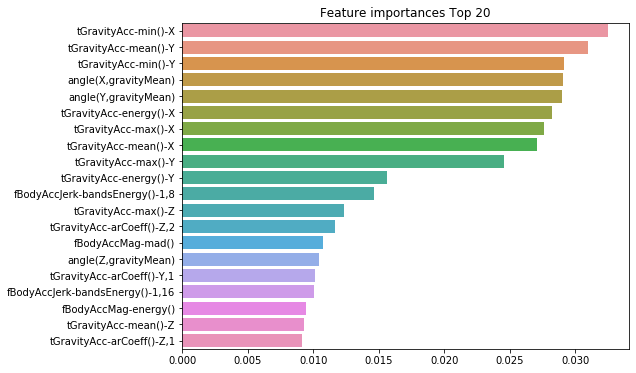

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 5 : GBM(Gradient Boosting Machine)

## GBM의 개요 및 실습

 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습 - 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다.
 
 여기서의 약한 학습기는 **결정트리**이고 이는 부스팅의 기반 알고리즘이다.

**에이다 부스트(AdaBoost)**는 오류 데이터에 **가중치**를 부여하면서 부스팅을 수행하는 대표적인 알고리즘이다.

**GBM(Gradient Boost Machine)**은 에이다 부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이이다.
> GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류는 물론이고, 회귀도 가능하다.

사이킷 런은 GBM 기반의 분류를 위해 GradientBoostingClassifier 클래스를 제공한다.

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 1419.5 초 


일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많다.

그러나 **수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력더 더 필요하다.**

사이킷런의 GradientBoostingClassifier는 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 **병렬 처리가 지원되지 않아서 대용량 데이터의 경우 학습에 매우 많은 시간이 필요하다.** 반면, 랜덤 포레스트의 경우 상대적으로 빠른 수행 시간을 보장해주기에 더 쉽게 예측 결과를 도출할 수 있다.

## GBM 하이퍼 파라미터 튜닝

n_estimators, max_depth, max_features와 같은 트리 기반 자체의 파라미터는 결정트리 및 랜덤 포레스트에서 언급했으므로 생략한다.

* loss : Gradient Descent에서 사용할 loss 함수를 지정한다. 특별한 이유가 없으면 default 값인 'deviance'(이탈도)를 그대로 적용한다.

* learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률이다.
 > Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수이다. 0~1 사이의 값을 지정할 수 있으며, default 값은 0.1이다. 너무 작은 값을 적용하면 업데이트되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 있다. 하지만 많은 weak learner는 수행 시간이 오래 걸리고, 모든 weak learner의 반복이 완료돼도 최소 오류 값을 찾지 못할 수도 있다. 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐버려 예측 성능이 떨어질 가능성이 있지만, 빠른 수행이 가능하다.
 
 > **이러한 특성 때문에, learning_rate는 n_estimators와 상호 보완적으로 조합해 사용한다.** learning_rate를 작게 하고 n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있다. 하지만 예측 성능이 현저히 좋아지지는 않으며, 수행 시간이 너무 오래걸린다는 단점이 있다.
 
 * n_estimators : weak learner의 개수이다.
 >weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 **일정 수준**까지는 좋아질 수 있다. 기본 값은 100이고 개수가 많아질 수록 수행 시간이 오래 걸린다.
 
 * subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율이다. 
 > 기본값은 1이며, 이는 전체 학습 데이터를 기반으로 학습한다는 의미이다.(0.5이면 학습 데이터의 50%), 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정한다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
'split0_test_score', 'split1_test_score']]

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

# 6 : XGBoost(eXtra Gradient Boost)

## XGBoost 개요

XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결해서 매우 각광을 받고 있다. 특히 XGBoost는 병렬 CPU 환경에서 **병렬 학습이 가능**해 기존 GBM보다 빠르게 학습을 완료할 수 있다.

* 뛰어난 예측 성능 : 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘한다.


* GBM 대비 빠른 수행 시간 : 일반적인 GBM은 순차적으로 Weak learner가 가중치를 증감하는 방법으로 학습하기 때문에 전반적으로 속도가 느리다. 하지만 XGBoost는 **병렬 수행 및 다양한 기능**으로 GBM에 비해 빠른 수행 성능을 보장한다. 그러나 일반적인 관점에서 다른 머신러닝 알고리즘에 비해서 빠르다는 의미는 아니다.


* 과적합 규제(Regularization) : 표준 GBM의 경우 과적합 규제 기능이 없으나, XGBoost는 자체에 과적합 규제 기능으로 과적합에 좀 더 강한 내구성을 가질 수 있다.


* Tree pruning : 일반적으로 GBM은 분할 시 부정 손실이 발생하면 분할을 더 이상 수행하지 않지만, 이러한 방식도 자칫 지나치게 많은 분할을 발생할 수 있다. 다른 GBM과 마찬가지로 XGBoost도 max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기해서 분할 수를 더 줄이는 추가적인 장점을 가지고 있다.


* 자체 내장된 교차 검증 : XGBoost는 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있다. 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있다.


* 결손값 자체 처리 : XGBoost는 결손 값을 자체 처리할 수 있는 기능을 가지고 있다.

### XGBoost는 파이썬 래퍼 클래스와 사이킷 런 클래스 두 가지 패키지가 존재한다.

 사이킷 런 래퍼 클래스는 XGBClassifier와 XGBRegressor이다. 이를 이용하면 사이킷런 estimator가 학습을 위해 사용하는 fit()과 predict()와 같은 표준 사이킷런 개발 프로세스 및 다양한 유틸리티를 활용할 수 있다.

### 파이썬 래퍼 XGBoost 적용 – 위스콘신 Breast Cancer 데이터 셋

**데이터 세트 로딩**

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)


In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)


**학습과 예측 데이터 세트를 DMatrix로 변환**

In [ ]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

**하이퍼 파라미터 설정**

In [ ]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings':100
        }
num_rounds = 400

**주어진 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달하고 학습**

In [ ]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , evals=wlist )

**predict()를 통해 예측 확률값을 반환하고 예측 값으로 변환**

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

**get_clf_eval( )을 통해 예측 평가**

In [ ]:
get_clf_eval(y_test , preds, pred_probs)

**Feature Importance 시각화**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### 사이킷런 Wrapper XGBoost 개요 및 적용 

**사이킷런 래퍼 클래스 임포트, 학습 및 예측**

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]


In [ ]:
get_clf_eval(y_test , w_preds, w_pred_proba)

**early stopping을 100으로 설정하고 재 학습/예측/평가**

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

**early stopping을 10으로 설정하고 재 학습/예측/평가**

In [ ]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

# 7 : LightGBM

LightGBM은 XGBoost와 함께 부스팅 계열 알고리즘에서 가장 각광을 받고 있다. XGBoost는 매우 뛰어난 부스팅 알고리즘이지만, 여전히 학습 시간이 오래 걸린다. XGBoost에서 GridSearchCV로 하여 파라미터 튜닝을 수행하다보면 너무 오래 걸려 어려움을 겪게 된다. 

LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점이다. 또한 메모리 사용량도 상대적으로 적다. LightGBM과 XGBoost의 예측 성능은 별다른 차이가 없으나, 기능상의 다양성은 LightGBM이 더 많다. 

**LightGBM의 한 가지 단점으로 알려진 것은 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다는 것이다.** 적은 데이터 세트의 기준은 애매하지만, 일반적으로 적은 데이터 세트라 함은 10,000건 이하의 데이터 세트 정도라고 LightGBM의 공식 문서에서 기술하고 있다.

**LightGBM**은 일반 GBM 계열의 트리 분할 방법과 다르게 **리프 중심 트리 분할(Leaf Wise) 방식을 사용한다.**

**기존의 대부분의 트리 기반 알고리즘**은 트리의 깊이를 효과적으로 줄이기 위한 **균형 트리 분할 방식(Level Wise) 방식**을 사용한다. 즉, 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 트리의 깊이가 최소화될 수 있다.
이렇게 균형 잡힌 트리를 생성하는 이유는 overfitting에 보다 더 강한 구조를 가질 수 있다고 알려져 있기 때문이다. 반대로 균형을 맞추기 위한 시간이 필요하다는 상대적인 단점도 존재한다.

하지만 LightGBM의 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성된다. 하지만 **이렇게 최대 손실 값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할 수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 LightGBM의 구현 사상이다.**

LightGBM의 XGBoost 대비 장점은 다음과 같이 정리할 수 있다.

* 더 빠른 학습과 예측 수행 시간.

* 더 작은 메모리 사용량

* 카테고리형(= 범주형) feature의 자동 변환과 최적 분할(원-핫 인코딩을 사용하지 않고도 카테고리형 feature을 최적으로 변환하고 이에 따른 노드 분할 수행).

* GPU 지원.

* XGBoost와 마찬가지로 대용량 데이터에 대한 뛰어난 예측 성능 및 병렬 컴퓨팅 기능 제공

Light GBM 또한 XGBoost와 같이 초기에는 파이썬 래퍼용 LightGBM만 개발됐으나, 이후 사이킷 런과의 호환성을 지원하기 위해 사이킷런 래퍼 LightGBM이 추가로 개발되었다.

사이킷런 래퍼 LightGBM 클래스는 분류를 위한 LGBMClassifier 클래스와 회귀를 위한 LGBMResgressor 클래스이다.

# 10 : 스태킹 앙상블

스태킹(Stacking)은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 앞의 배깅 및 부스팅과 공통점을 가고 있다. 그러나 가장 큰 차이점은 **개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 것이다.**

즉, 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘을 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식이다.( 이렇게 개별 모델의 예측된 데이터 세트를 다시 기반으로 하여 학습하고 예측하는 방식을 메타 모델이라고 한다.)

스태킹 모델은 두 종류의 모델이 필요하다. 첫 번째는 개별적인 기반 모델이고, 두 번째 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델이다. 스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합하여 최종 메타 모델의 학습용 feature 데이터 세트와 테스트용 feature 데이터 set을 만드는 것이다.